Context
Predict next-day rain by training classification models on the target variable RainTomorrow.

Content
This dataset contains about 10 years of daily weather observations from many locations across Australia.

RainTomorrow is the target variable to predict. It means -- did it rain the next day, Yes or No? This column is Yes if the rain for that day was 1mm or more.

Source & Acknowledgements
Observations were drawn from numerous weather stations. The daily observations are available from http://www.bom.gov.au/climate/data.
An example of latest weather observations in Canberra: http://www.bom.gov.au/climate/dwo/IDCJDW2801.latest.shtml

Definitions adapted from http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml
Data source: http://www.bom.gov.au/climate/dwo/ and http://www.bom.gov.au/climate/data.

Copyright Commonwealth of Australia 2010, Bureau of Meteorology.

https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

In [17]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [18]:
import tensorflow as tf
import pandas as pd
import numpy as np
print(tf.__version__)
import zipfile

2.4.1


In [19]:
%cd /content/drive/My\ Drive/Colab\ Notebooks

/content/drive/My Drive/Colab Notebooks


In [20]:
#zip_ref = zipfile.ZipFile('./archive.zip', 'r')
#zip_ref.extractall("/tmp")
#weatherAUS = pd.read_csv(zip_ref.open('weatherAUS.csv'))
#zip_ref.close()

In [21]:

weatherAUS = pd.read_csv('/content/drive/My Drive/Colab Notebooks/weatherAUS.csv')

In [22]:
weatherAUS.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [23]:
# Check if duplicate data exits

duplicates = weatherAUS.duplicated()
print('Number of duplicate rows = %d' % (duplicates.sum()))

Number of duplicate rows = 0


In [24]:
weatherAUS.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [25]:
weatherAUS['Date'] = pd.to_datetime(weatherAUS['Date'])

In [26]:
print("Latest Incident Date as per dataset : ", weatherAUS.Date.max())
print("Oldest Incident Date as per dataset : ", weatherAUS.Date.min())

Latest Incident Date as per dataset :  2017-06-25 00:00:00
Oldest Incident Date as per dataset :  2007-11-01 00:00:00


In [27]:
weatherAUS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

In [28]:
weatherAUS.describe(include=['object'])

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,135134,134894,141232,142199,142193
unique,49,16,16,16,2,2
top,Canberra,W,N,SE,No,No
freq,3436,9915,11758,10838,110319,110316


In [29]:
weatherAUS.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [30]:
weatherAUS.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.736555,0.103938,0.466993,0.072586,0.177415,0.175064,0.175173,-0.232899,0.006089,-0.450970,-0.461292,0.078754,0.021605,0.901821,0.708906
MaxTemp,0.736555,1.000000,-0.074992,0.587932,0.470156,0.067615,0.014450,0.050300,-0.504110,-0.508855,-0.332061,-0.427167,-0.289370,-0.277921,0.887210,0.984503
Rainfall,0.103938,-0.074992,1.000000,-0.064351,-0.227549,0.133659,0.087338,0.057887,0.224405,0.255755,-0.168154,-0.126534,0.198528,0.172403,0.011192,-0.079657
Evaporation,0.466993,0.587932,-0.064351,1.000000,0.365602,0.203021,0.193084,0.129400,-0.504092,-0.390243,-0.270362,-0.293581,-0.183793,-0.182618,0.545115,0.572893
Sunshine,0.072586,0.470156,-0.227549,0.365602,1.000000,-0.034750,0.005499,0.053834,-0.490819,-0.629130,0.041970,-0.019719,-0.675323,-0.703930,0.291188,0.490501
WindGustSpeed,0.177415,0.067615,0.133659,0.203021,-0.034750,1.000000,0.605303,0.686307,-0.215070,-0.026327,-0.458744,-0.413749,0.071736,0.109168,0.150150,0.032748
WindSpeed9am,0.175064,0.014450,0.087338,0.193084,0.005499,0.605303,1.000000,0.519547,-0.270858,-0.031614,-0.228743,-0.175817,0.025112,0.054639,0.128545,0.004569
WindSpeed3pm,0.175173,0.050300,0.057887,0.129400,0.053834,0.686307,0.519547,1.000000,-0.145525,0.016432,-0.296351,-0.255439,0.053337,0.025396,0.163030,0.027778
Humidity9am,-0.232899,-0.504110,0.224405,-0.504092,-0.490819,-0.215070,-0.270858,-0.145525,1.000000,0.666949,0.139442,0.186858,0.452297,0.357326,-0.471354,-0.498399
Humidity3pm,0.006089,-0.508855,0.255755,-0.390243,-0.629130,-0.026327,-0.031614,0.016432,0.666949,1.000000,-0.027544,0.051997,0.517120,0.523120,-0.221019,-0.557841


In [31]:
cat_columns=[]
num_columns=[]
for one_column_name in weatherAUS:
    if 'object' in str(weatherAUS[one_column_name].dtype):
        cat_columns.append(one_column_name)
    elif 'float' in str(weatherAUS[one_column_name].dtype):
        num_columns.append(one_column_name)
print("Categorical",cat_columns)
print("Numercial",num_columns)

Categorical ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
Numercial ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [32]:
number_of_rows=weatherAUS.shape[0]
number_of_nan_in_column=weatherAUS.isnull().sum(axis=0)
print(pd.concat([number_of_nan_in_column,(number_of_nan_in_column/number_of_rows*100).round(1)],axis=1).rename(columns={0:'Number of NaN',1:'Number of NaN in %'}))

               Number of NaN  Number of NaN in %
Date                       0                 0.0
Location                   0                 0.0
MinTemp                 1485                 1.0
MaxTemp                 1261                 0.9
Rainfall                3261                 2.2
Evaporation            62790                43.2
Sunshine               69835                48.0
WindGustDir            10326                 7.1
WindGustSpeed          10263                 7.1
WindDir9am             10566                 7.3
WindDir3pm              4228                 2.9
WindSpeed9am            1767                 1.2
WindSpeed3pm            3062                 2.1
Humidity9am             2654                 1.8
Humidity3pm             4507                 3.1
Pressure9am            15065                10.4
Pressure3pm            15028                10.3
Cloud9am               55888                38.4
Cloud3pm               59358                40.8
Temp9am             

In [33]:
weatherAUS=weatherAUS.dropna(subset=['RainTomorrow'])

In [34]:
weatherAUS.shape

(142193, 23)

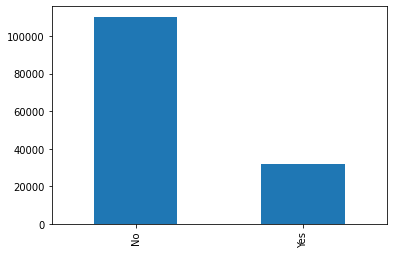

In [35]:
weatherAUS['RainTomorrow'].value_counts().plot(kind='bar')

In [36]:
print("Categorical column cardinality :")
for var in cat_columns:
    print('{} : {} labels'.format(var,len(weatherAUS[var].unique())))

Categorical column cardinality :
Location : 49 labels
WindGustDir : 17 labels
WindDir9am : 17 labels
WindDir3pm : 17 labels
RainToday : 3 labels
RainTomorrow : 2 labels


In [37]:
target_attributes=["year","month","day"]
for one_target_attribute in target_attributes:
    new_column_name=one_target_attribute[0].upper()+one_target_attribute[1:]
    weatherAUS[new_column_name]=getattr(weatherAUS['Date'].dt,one_target_attribute)

In [38]:
weatherAUS=weatherAUS.drop(columns=['Date'])

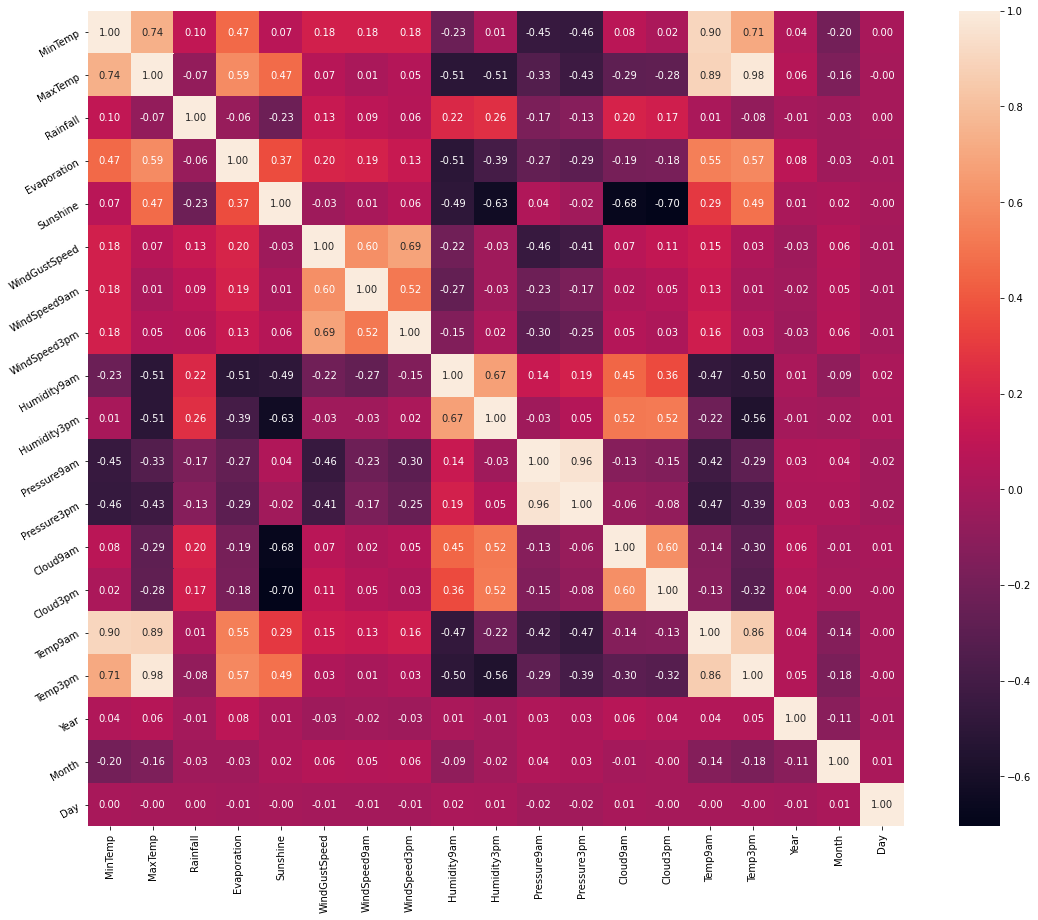

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize=(20, 15))
ax = sns.heatmap(weatherAUS.corr(), square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

In [40]:
weatherAUS.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Year', 'Month', 'Day'],
      dtype='object')

In [41]:
def missingValues(df):
  temp_data = pd.DataFrame(df.dtypes)
  temp_data['Missing Values'] = df.isnull().sum()
  temp_data['Unique Count/Values'] = df.nunique()
  return temp_data
missingValues(weatherAUS)

,0,Missing Values,Unique Count/Values
Location,object,0,49
MinTemp,float64,637,389
MaxTemp,float64,322,505
Rainfall,float64,1406,679
Evaporation,float64,60843,356
Sunshine,float64,67816,145
WindGustDir,object,9330,16
WindGustSpeed,float64,9270,67
WindDir9am,object,10013,16
WindDir3pm,object,3778,16


In [42]:
def missingvalue_cleaning(df):
  for one_column in df.columns:
        df[one_column].fillna(df[one_column].mode()[0], inplace=True)        
  return df
missingvalue_cleaning(weatherAUS)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,4.0,0.0,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,4.0,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,4.0,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,4.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,4.0,0.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,4.0,0.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,7.0,7.0,9.4,20.9,No,No,2017,6,20
145455,Uluru,2.8,23.4,0.0,4.0,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,7.0,7.0,10.1,22.4,No,No,2017,6,21
145456,Uluru,3.6,25.3,0.0,4.0,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,7.0,7.0,10.9,24.5,No,No,2017,6,22
145457,Uluru,5.4,26.9,0.0,4.0,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,7.0,7.0,12.5,26.1,No,No,2017,6,23


In [43]:
missingValues(weatherAUS)

,0,Missing Values,Unique Count/Values
Location,object,0,49
MinTemp,float64,0,389
MaxTemp,float64,0,505
Rainfall,float64,0,679
Evaporation,float64,0,356
Sunshine,float64,0,145
WindGustDir,object,0,16
WindGustSpeed,float64,0,67
WindDir9am,object,0,16
WindDir3pm,object,0,16


In [44]:
weatherAUS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        142193 non-null  float64
 2   MaxTemp        142193 non-null  float64
 3   Rainfall       142193 non-null  float64
 4   Evaporation    142193 non-null  float64
 5   Sunshine       142193 non-null  float64
 6   WindGustDir    142193 non-null  object 
 7   WindGustSpeed  142193 non-null  float64
 8   WindDir9am     142193 non-null  object 
 9   WindDir3pm     142193 non-null  object 
 10  WindSpeed9am   142193 non-null  float64
 11  WindSpeed3pm   142193 non-null  float64
 12  Humidity9am    142193 non-null  float64
 13  Humidity3pm    142193 non-null  float64
 14  Pressure9am    142193 non-null  float64
 15  Pressure3pm    142193 non-null  float64
 16  Cloud9am       142193 non-null  float64
 17  Cloud3pm       142193 non-nul

In [45]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [46]:
import copy
print(num_columns)
print(cat_columns)
num_columns_temp=copy.deepcopy(num_columns)
num_columns_temp.append("Year")
num_columns_temp.append("Month")
num_columns_temp.append("Day")
cat_columns_temp=copy.deepcopy(cat_columns)
cat_columns_temp.remove("Location")
cat_columns_temp.remove("RainTomorrow")

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [47]:
weatherAUS=MultiColumnLabelEncoder(columns =cat_columns).fit_transform(weatherAUS)

In [48]:
weatherAUS.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2,13.4,22.9,0.6,4.0,0.0,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,0,0,2008,12,1
1,2,7.4,25.1,0.0,4.0,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,0,0,2008,12,2
2,2,12.9,25.7,0.0,4.0,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,0,0,2008,12,3
3,2,9.2,28.0,0.0,4.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,0,0,2008,12,4
4,2,17.5,32.3,1.0,4.0,0.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12,5


In [49]:
from sklearn.utils import resample
#     8.1. Resample (oversampling) on train dataset    

no_df = weatherAUS[weatherAUS.RainTomorrow == 0]
yes_df = weatherAUS[weatherAUS.RainTomorrow == 1]

    # Resample (oversampling)
yes_oversampled_df = resample(yes_df, replace=True, n_samples=len(no_df), random_state=123)

    # Concat oversampled one and existing one
oversampled_weatherAUS = pd.concat([no_df, yes_oversampled_df])

In [50]:
X=oversampled_weatherAUS.drop(columns=['RainTomorrow'])
Y=oversampled_weatherAUS['RainTomorrow']

In [51]:
print(X.head())
print(Y[:5])

   Location  MinTemp  MaxTemp  Rainfall  ...  RainToday  Year  Month  Day
0         2     13.4     22.9       0.6  ...          0  2008     12    1
1         2      7.4     25.1       0.0  ...          0  2008     12    2
2         2     12.9     25.7       0.0  ...          0  2008     12    3
3         2      9.2     28.0       0.0  ...          0  2008     12    4
4         2     17.5     32.3       1.0  ...          0  2008     12    5

[5 rows x 24 columns]
0    0
1    0
2    0
3    0
4    0
Name: RainTomorrow, dtype: int64


In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7,stratify= Y)

In [53]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(176505, 24)
(44127, 24)
(176505,)
(44127,)


In [54]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176505 entries, 81112 to 40681
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       176505 non-null  int64  
 1   MinTemp        176505 non-null  float64
 2   MaxTemp        176505 non-null  float64
 3   Rainfall       176505 non-null  float64
 4   Evaporation    176505 non-null  float64
 5   Sunshine       176505 non-null  float64
 6   WindGustDir    176505 non-null  int64  
 7   WindGustSpeed  176505 non-null  float64
 8   WindDir9am     176505 non-null  int64  
 9   WindDir3pm     176505 non-null  int64  
 10  WindSpeed9am   176505 non-null  float64
 11  WindSpeed3pm   176505 non-null  float64
 12  Humidity9am    176505 non-null  float64
 13  Humidity3pm    176505 non-null  float64
 14  Pressure9am    176505 non-null  float64
 15  Pressure3pm    176505 non-null  float64
 16  Cloud9am       176505 non-null  float64
 17  Cloud3pm       176505 non-

In [55]:
cat_columns

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [61]:
cat_columns.remove('RainTomorrow')

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
# Create model
minmax_scaler=MinMaxScaler()
    
# Fit
minmax_scaler.fit(X_train[num_columns])

# Transform
X_train_numerical_scaled=minmax_scaler.transform(X_train[num_columns])
    
# Concatenate
X_train_np=np.concatenate((X_train[cat_columns], X_train_numerical_scaled), axis=1)
    
# ================================================================================
# Create model
logreg = LogisticRegression(solver='liblinear', random_state=0)

# Fit
logreg.fit(X_train_np, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
from sklearn.metrics import accuracy_score,confusion_matrix
y_pred_train=logreg.predict(X_train_np)
print('Model accuracy score: {0:0.4f} with train dataset'. format(accuracy_score(y_train, y_pred_train)))

print('tn fp\nfn tp\n',confusion_matrix(y_train, y_pred_train))
tn=confusion_matrix(y_train, y_pred_train)[0,0]
fp=confusion_matrix(y_train, y_pred_train)[0,1]
fn=confusion_matrix(y_train, y_pred_train)[1,0]
tp=confusion_matrix(y_train, y_pred_train)[1,1]
print('accuracy : ',(tp+tn)/(tp+fp+tn+fn))
print('recall (sensitivity,true positive rate) : ',tp/(tp+fn))
print('specificity : ',tn/(tn+fp))
print('precision : ',tp/(tp+fp))
print('f1-score : ',((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn))))

Model accuracy score: 0.7733 with train dataset
tn fp
fn tp
 [[69570 18683]
 [21322 66930]]
accuracy :  0.7733491969066032
recall (sensitivity,true positive rate) :  0.7583964102796538
specificity :  0.7883018141026368
precision :  0.7817737960356488
f1-score :  0.3849538434992667


In [64]:
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report
# Import ensemble machine learning library
from keras import callbacks
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor,IsolationForest)

In [69]:
#### Define the call back ####
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define the model
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers import Bidirectional

stop = EarlyStopping(monitor="val_loss", patience=5)

#reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, min_lr=1e-5, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, min_lr=1e-6, verbose=1)

# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 25, kernel_initializer = 'uniform', activation = 'relu', input_dim = 21))
model.add(Dense(units = 25, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [70]:

# Train the ANN
history = model.fit(X_train_np, y_train, batch_size = 32, epochs = 150, callbacks=[early_stopping], validation_split=0.2)
history_df = pd.DataFrame(history.history)


Epoch 1/150
4413/4413 [==============================] - 8s 2ms/step - loss: 0.6932 - accuracy: 0.5004 - val_loss: 0.6931 - val_accuracy: 0.5026
Epoch 2/150
4413/4413 [==============================] - 8s 2ms/step - loss: 0.6932 - accuracy: 0.4989 - val_loss: 0.6933 - val_accuracy: 0.4974
Epoch 3/150
4413/4413 [==============================] - 7s 2ms/step - loss: 0.6932 - accuracy: 0.4988 - val_loss: 0.6932 - val_accuracy: 0.4974
Epoch 4/150
4413/4413 [==============================] - 7s 2ms/step - loss: 0.6932 - accuracy: 0.5015 - val_loss: 0.6932 - val_accuracy: 0.4974
Epoch 5/150
4413/4413 [==============================] - 7s 2ms/step - loss: 0.6932 - accuracy: 0.4967 - val_loss: 0.6934 - val_accuracy: 0.4974
Epoch 6/150
4413/4413 [==============================] - 7s 2ms/step - loss: 0.6932 - accuracy: 0.5017 - val_loss: 0.6931 - val_accuracy: 0.5026
Epoch 7/150
4413/4413 [==============================] - 7s 2ms/step - loss: 0.6932 - accuracy: 0.4988 - val_loss: 0.6931 - val_ac

In [76]:
# Predicting the test set results
y_pred_ann = model.predict(X_train_np)
y_pred_ann = (y_pred_ann > 0.5)
#### calculate the accuracy and print ####
model_scores = model.evaluate(X_train_np, y_pred_ann, verbose=0)
print("Accuracy of the NN model : %.2f%%" % (model_scores[1]*100))

Accuracy of the NN model : 100.00%
